XGBOOST

In [2]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 882.6 kB/s eta 0:02:21
   ---------------------------------------- 0.8/124.9 MB 882.6 kB/s eta 0:02:21
   ---------------------------------------- 1.0/124.9 MB 986.7 kB/s eta 0:02:06
   ---------------------------------------- 1.3/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 1.3/124.9 MB 1.0 MB/s eta 0:02:00
    --------------------------------------- 1.6/124.9 MB 998.3 kB/s eta 0:02:04
    --------------------------------------- 1.8/124.9 MB 976.9 kB/s eta 0:02:06
    --------------------------------------- 2.1/124.9 MB 978.7 kB/s eta 0:02:06
    --------------------------------------- 2.4/124.9 MB 1.0 MB/s eta 0:02:03
    --------------------------------------- 2.4/124.9 MB 1.0 MB/s eta 0:0


#### Step 1 - Data Ingestion

In [3]:

import pandas as pd
df = pd.read_csv("booking_train.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1



#### Target - booking_status
1.0 - Not cancelled
2.1 - Cancelled


#### Step 2 - Check the basic data quality

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [7]:

df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:

df.duplicated().sum()

np.int64(0)

#### Step 3 - Seperate X and Y(booking_status)
id - statistically insginificant column

In [10]:

X = df.drop(columns=["id", "booking_status"])
Y = df[["booking_status"]]

In [11]:

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [12]:

Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [13]:

Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

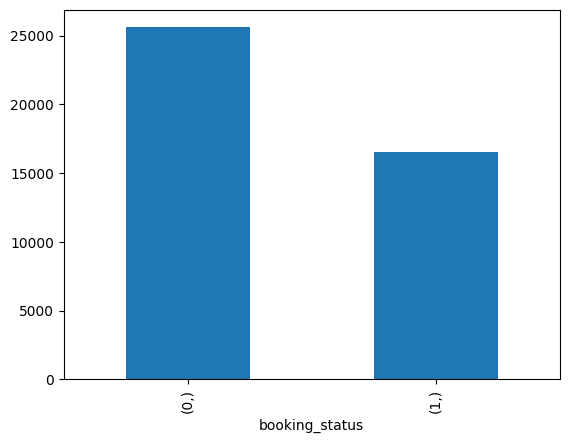

In [14]:

Y.value_counts().plot(kind="bar")


#### Step 4 - Apply Preprocessing on X

In [16]:

X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:

num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [19]:

X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691



#### Step 5 - Apply train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [22]:

xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [23]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [24]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [25]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [26]:
xtrain.shape

(33680, 17)

In [27]:
xtest.shape

(8420, 17)

#### Step 6 - Model Building
XGBoost - Hyperparameter tuning not required

In [29]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=3, n_estimators=200)

model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Step 7 - Model evaluation

In [31]:

model.score(xtrain, ytrain)

0.8330166270783848

In [32]:

model.score(xtest, ytest)

0.8226840855106888